In [1]:
#To automate the loan eligiblity process based on customer details provided while filling the online application form.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

In [3]:
#read in file
df = pd.read_csv("Loan Prediction Dataset.csv")

In [4]:
#show data
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
#number of roles and columns
print(df.shape)

(614, 13)


In [6]:
#sample data size
df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
280,LP001910,Male,No,1,Not Graduate,Yes,4053,2426.0,158.0,360.0,0.0,Urban,N
536,LP002734,Male,Yes,0,Graduate,No,6133,3906.0,324.0,360.0,1.0,Urban,Y
330,LP002097,Male,No,1,Graduate,No,4384,1793.0,117.0,360.0,1.0,Urban,Y
223,LP001749,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
498,LP002600,Male,Yes,1,Graduate,Yes,2895,0.0,95.0,360.0,1.0,Semiurban,Y


In [7]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
#data statitics
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
#attribute that will determine the loan decision
df.info

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849          

In [10]:
#totoal number of missing values
df.isnull().sum().sum()

149

In [11]:
#find the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
#drop null values
df.dropna(inplace=True)

In [13]:
#check if there are still null values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

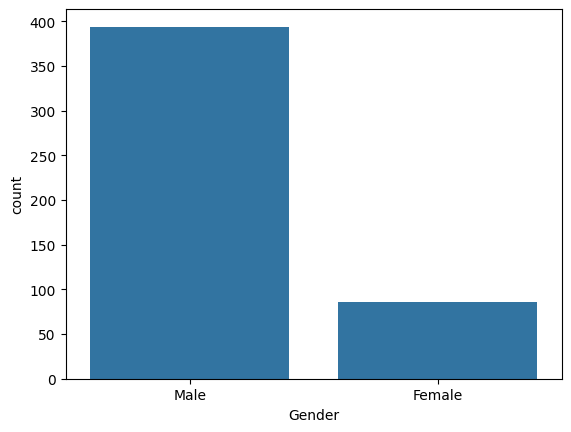

In [14]:
#Analysis data per each of the categorical attributes

sns.countplot(x=df['Gender'])


<Axes: xlabel='Married', ylabel='count'>

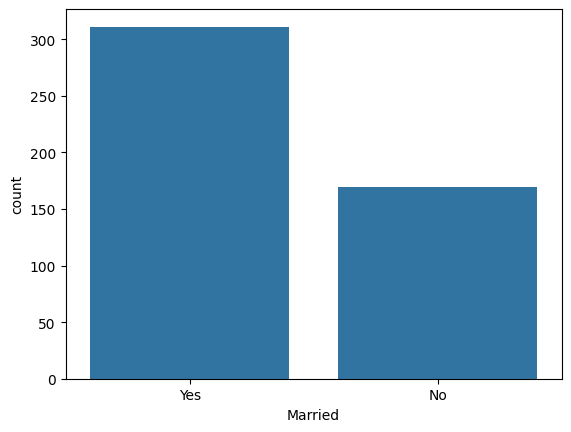

In [15]:
sns.countplot(x=df['Married'])

<Axes: xlabel='Dependents', ylabel='count'>

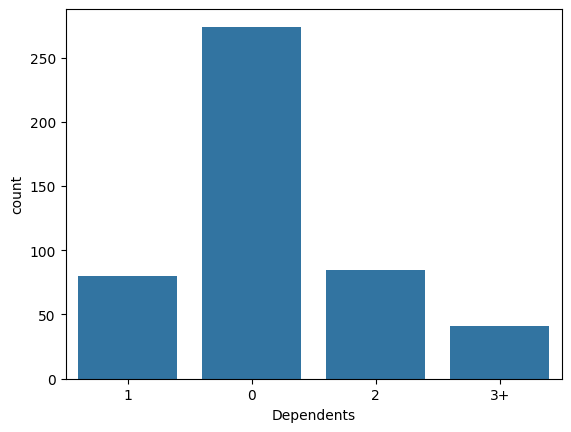

In [16]:
sns.countplot(x=df['Dependents'])

<Axes: xlabel='Education', ylabel='count'>

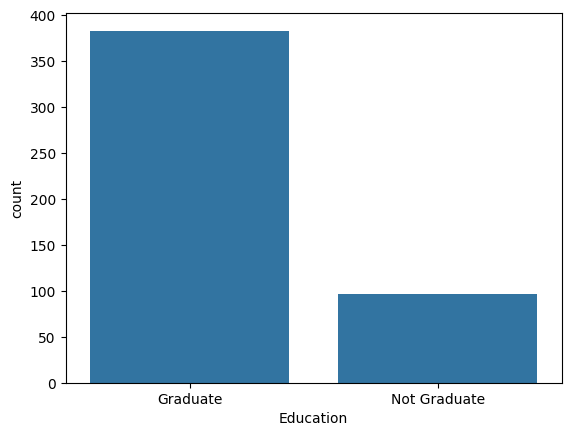

In [17]:
sns.countplot(x=df['Education'])

<Axes: xlabel='Self_Employed', ylabel='count'>

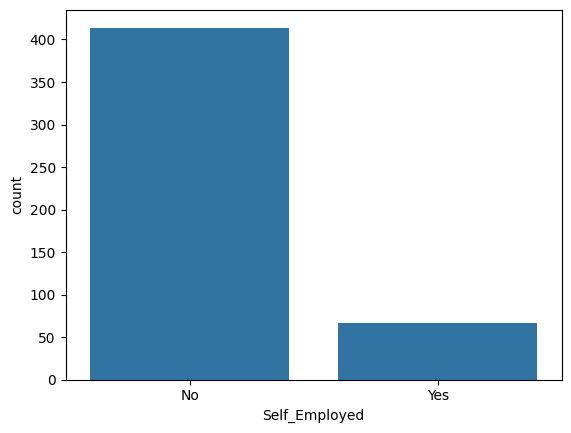

In [18]:
sns.countplot(x=df['Self_Employed'])

<Axes: xlabel='Property_Area', ylabel='count'>

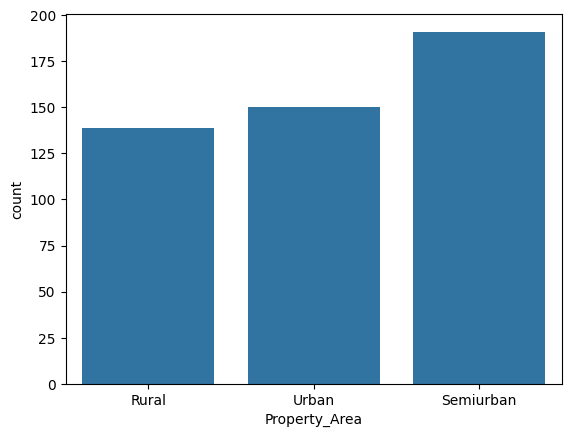

In [19]:
sns.countplot(x=df['Property_Area'])

<Axes: xlabel='Loan_Status', ylabel='count'>

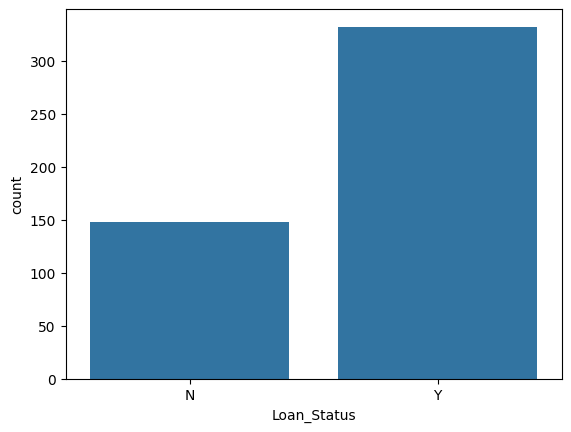

In [20]:
sns.countplot(x=df['Loan_Status'])

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

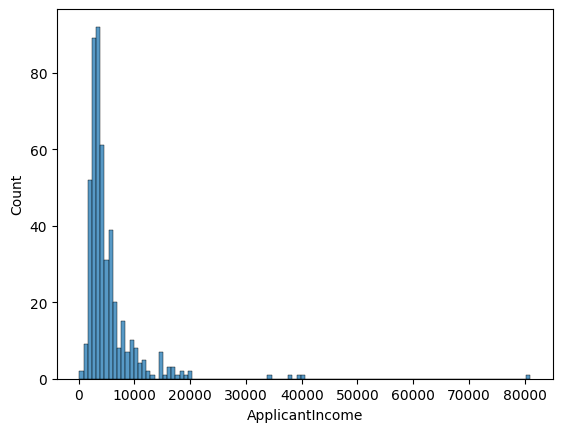

In [21]:
#Visualization of Numerical attributes
sns.histplot(df['ApplicantIncome'])

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

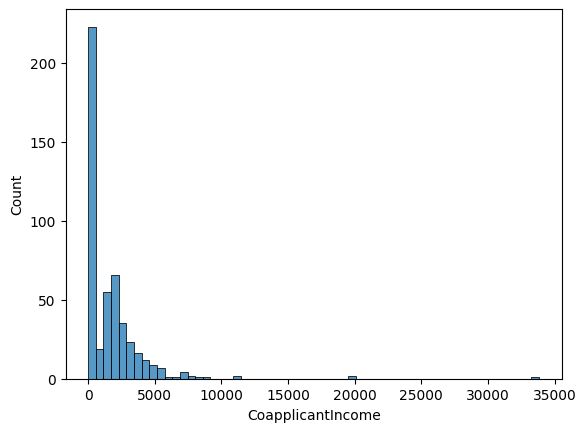

In [22]:
sns.histplot(df['CoapplicantIncome'])

<Axes: xlabel='LoanAmount', ylabel='Count'>

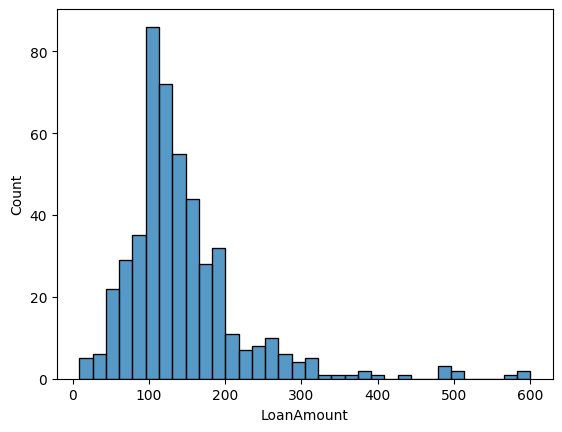

In [23]:
sns.histplot(df['LoanAmount'])

<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

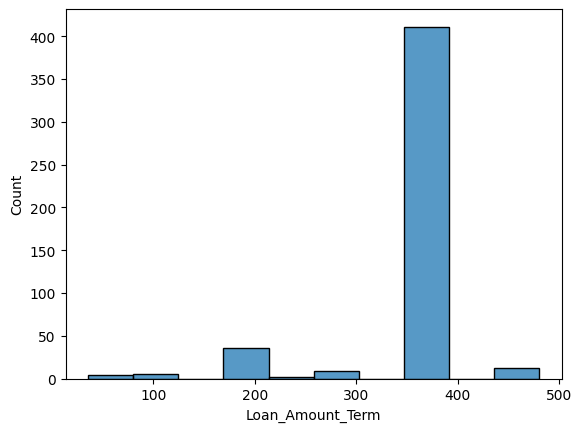

In [24]:
sns.histplot(df['Loan_Amount_Term'])

<Axes: xlabel='Credit_History', ylabel='Count'>

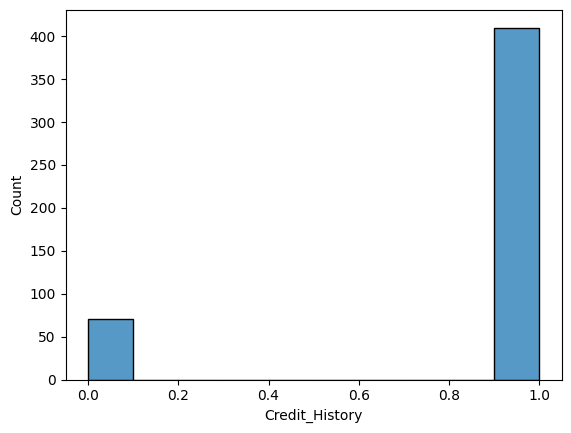

In [25]:
sns.histplot(df['Credit_History'])

In [26]:
#Create new column total Income with the assumuption that applicant might be staying together
df['Total_income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0


<Axes: xlabel='Total_income', ylabel='Count'>

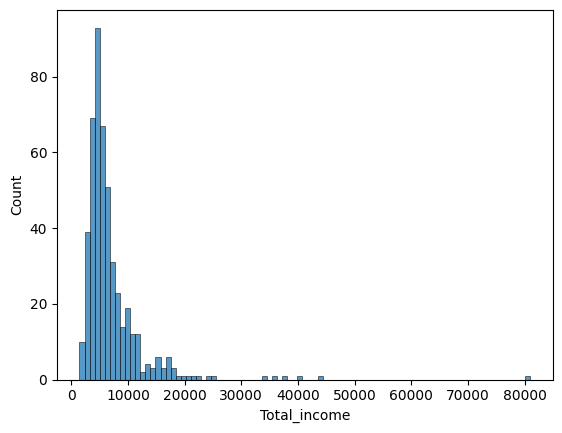

In [27]:
sns.histplot(df['Total_income'])

In [28]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,3849.0
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,5540.0
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,5532.0
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,23809.0
10,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y,3900.0


In [29]:
df.drop(['Loan_ID', 'ApplicantIncome' , 'CoapplicantIncome'], axis=1, inplace=True)

In [30]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0
5,Male,Yes,2,Graduate,Yes,267.0,360.0,1.0,Urban,Y,9613.0
6,Male,Yes,0,Not Graduate,No,95.0,360.0,1.0,Urban,Y,3849.0
7,Male,Yes,3+,Graduate,No,158.0,360.0,0.0,Semiurban,N,5540.0
8,Male,Yes,2,Graduate,No,168.0,360.0,1.0,Urban,Y,5532.0
9,Male,Yes,1,Graduate,No,349.0,360.0,1.0,Semiurban,N,23809.0
10,Male,Yes,2,Graduate,No,70.0,360.0,1.0,Urban,Y,3900.0


In [31]:
#convert categorical variable to numerical 
df['Gender1'] = df['Gender'].map({'Male' : 0, 'Female': 1})
df['Education1'] = df['Education'].map({'Graduate' : 0, 'Not Graduate' : 1})
df['Married1'] = df['Married'].map({'Yes' : 0, 'No' : 1})
df['Loan_Status1'] = df['Loan_Status'].map({'Y' :0, 'N':1})
df['Self_Employed1'] = df['Self_Employed'].map({'Yes' :0, 'No' :1})

#0 for Rural, urban for 1, semi urban for 2
df['Property_Area1'] = df['Property_Area'].map({'Rural' :0, 'Urban' :1, 'Semiurban' :2})
#3 or more dependents will be classed as 3
df['Dependents1'] = df['Dependents'].map({'1' :1, '0' :0, '2' :2, '3+' :3})



In [32]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income,Gender1,Education1,Married1,Loan_Status1,Self_Employed1,Property_Area1,Dependents1
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0,0,0,0,1,1,0,1
2,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0,0,0,0,0,0,1,0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0,0,1,0,0,1,1,0
4,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0,0,0,1,0,1,1,0
5,Male,Yes,2,Graduate,Yes,267.0,360.0,1.0,Urban,Y,9613.0,0,0,0,0,0,1,2
6,Male,Yes,0,Not Graduate,No,95.0,360.0,1.0,Urban,Y,3849.0,0,1,0,0,1,1,0
7,Male,Yes,3+,Graduate,No,158.0,360.0,0.0,Semiurban,N,5540.0,0,0,0,1,1,2,3
8,Male,Yes,2,Graduate,No,168.0,360.0,1.0,Urban,Y,5532.0,0,0,0,0,1,1,2
9,Male,Yes,1,Graduate,No,349.0,360.0,1.0,Semiurban,N,23809.0,0,0,0,1,1,2,1
10,Male,Yes,2,Graduate,No,70.0,360.0,1.0,Urban,Y,3900.0,0,0,0,0,1,1,2


In [40]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay


In [34]:
#Assign features and classes to X and Y values
#x is independent varaibles
#y is dependent variable
x= df[['Gender1', 'Married1', 'Dependents1', 'Education1', 'Self_Employed1', 'Credit_History', 'Property_Area1', 'Total_income']]
y=df['Loan_Status1']

In [35]:
print(x.shape)
print(y.shape)

(480, 8)
(480,)


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
#split data into training and test set
#30% of total data to be used as test size

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state= 42)

In [38]:
print(x_train.shape)
print(x_test.shape)

(336, 8)
(144, 8)


In [39]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [42]:
#import model to train data
model=LogisticRegression(multi_class='multinomial',solver='newton-cg')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [44]:
print("confusion_matrix:")
print(confusion_matrix(y_test,y_pred))
print("\nclassification report:")
print(classification_report(y_test,y_pred))

confusion_matrix:
[[100   0]
 [ 29  15]]

classification report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.87       100
           1       1.00      0.34      0.51        44

    accuracy                           0.80       144
   macro avg       0.89      0.67      0.69       144
weighted avg       0.84      0.80      0.76       144

